# Project Description
### The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?
### Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?
### The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
### The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

### The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

### The Dystopia Residual is already provided in the dataset. 

### If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

### You need to predict the happiness score considering all the other factors mentioned in the dataset.



## Step 1: Importing Basic Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Step 2 : Loading Data :  Importing the dataset into our data analysis environment


In [2]:
df = pd.read_csv('/Users/sneha/Downloads/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## Step 3: Perfrom EDA on Data

In [3]:
## Top 5 countries 
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
## Bottom five countries 
df.tail(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
# Check dimensions
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 158
Number of columns: 12


In [7]:
# Data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [8]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

## Happiness Score is the Output - which is a float value. Hence A regression Model is to be built. 

### 3 Summary Statistics: Compute summary statistics (e.g., mean, median, standard deviation, min, max) for numerical variables. This helps to understand the central tendencies and distributions of the data. 

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Happiness Score min is - 2.8 - hence a dystopia number. 
## Max is - 7.58 

# 4. Check for missing values

In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## 5. As we can see there's only one column with least unique values - hence is treated as categorical column.

In [12]:
unique_values_counts= df['Region'].value_counts()
unique_values_counts

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

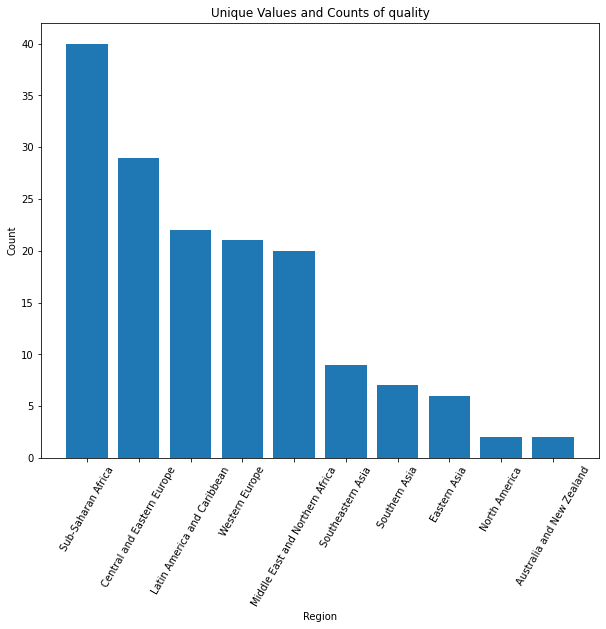

In [13]:
# Display unique values and their counts graphically
plt.figure(figsize=(10, 8))

plt.bar(unique_values_counts.index, unique_values_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title(f'Unique Values and Counts of quality')
plt.xticks(rotation=60)
plt.show()

## 6.  Visualie  Happiness Score in World MAp 

In [14]:
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
#loading necessary libraries for mapping

init_notebook_mode(connected=True)

data = dict(type = 'choropleth', #As we have only country names in data, we can use country names to see the happiness
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           colorscale='Rainbow',
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})
layout = dict(
    geo={'scope': 'world'},
    width=1100,  # Set the width of the figure
    height=800  # Set the height of the figure
)

choromap = go.Figure(data = [data], layout = layout)
choromap.show()

## 7. Visualise the distribution data by plotting Histogram agains the cout plot

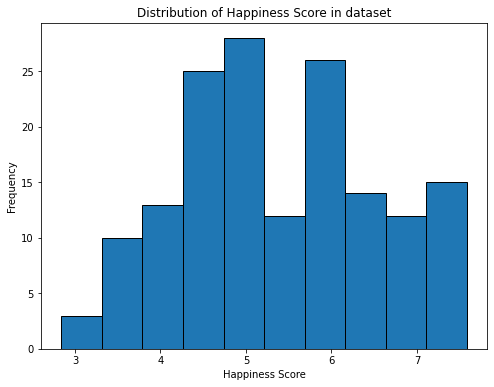

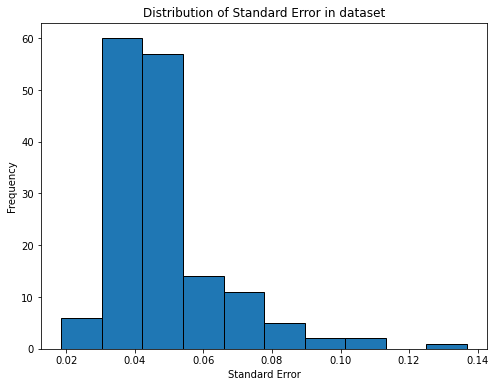

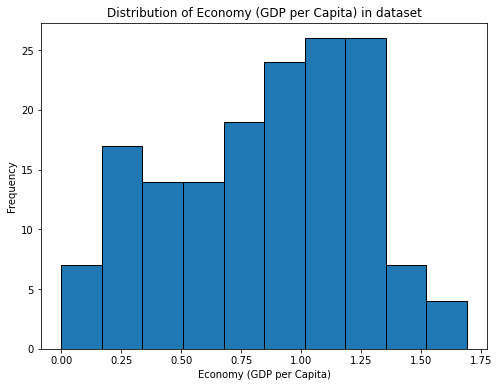

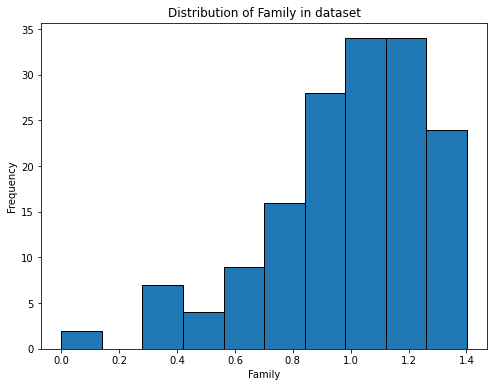

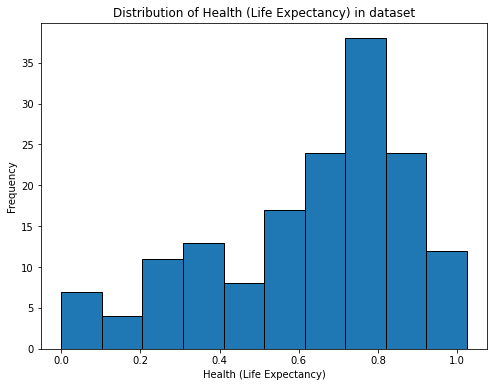

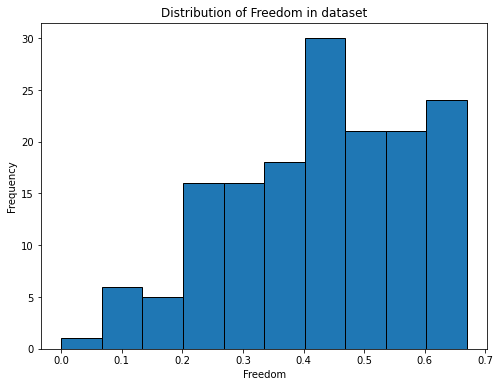

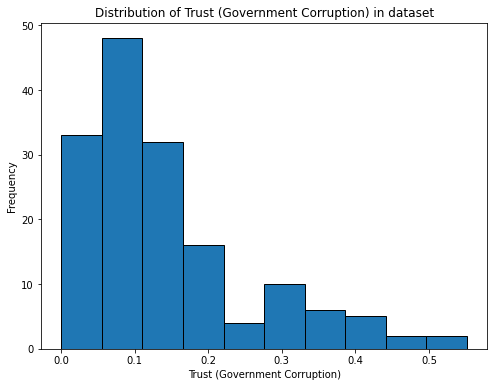

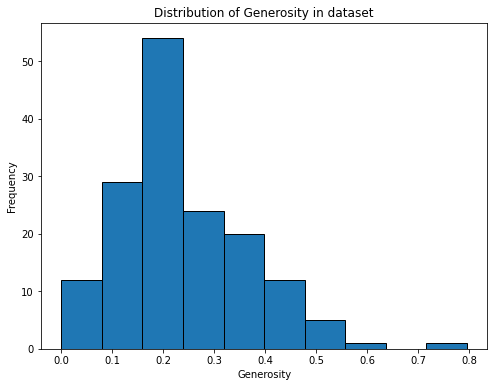

In [15]:
## Plot histrogram 
cols = df.iloc[:,3:11].columns
cols

for column in cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.title(f'Distribution of {column} in dataset')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## 8. Plot Scatter Plot of features Vs Output 


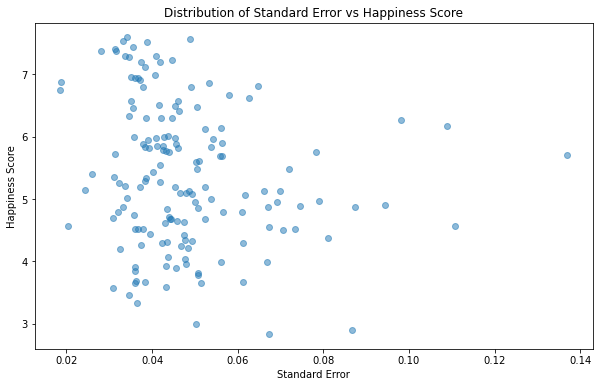

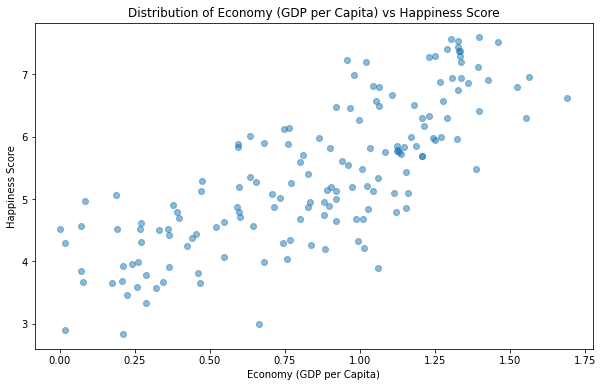

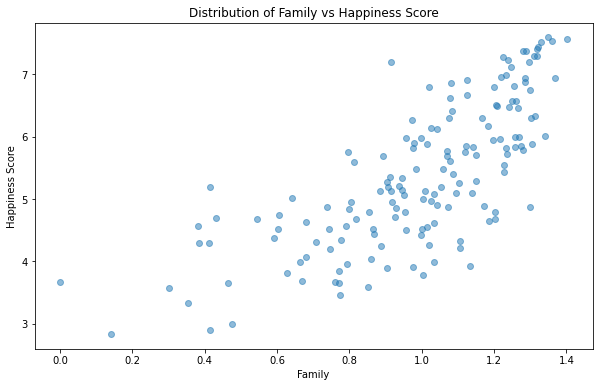

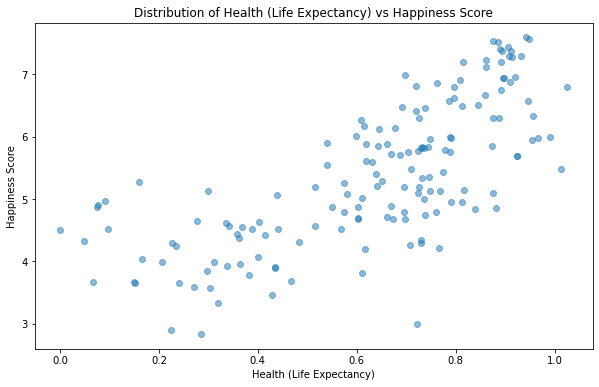

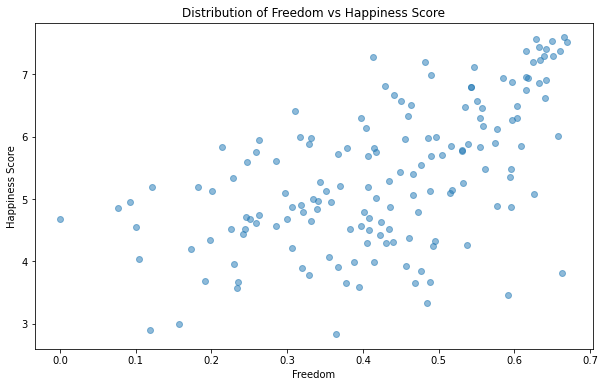

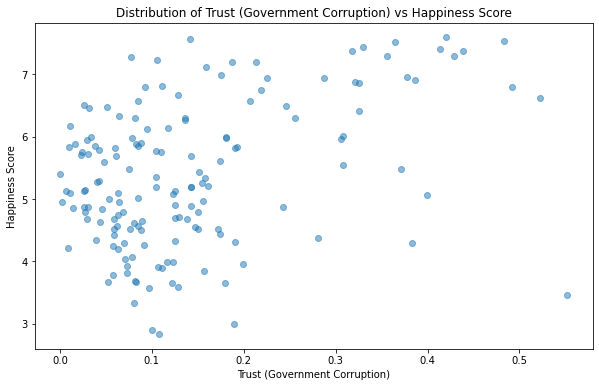

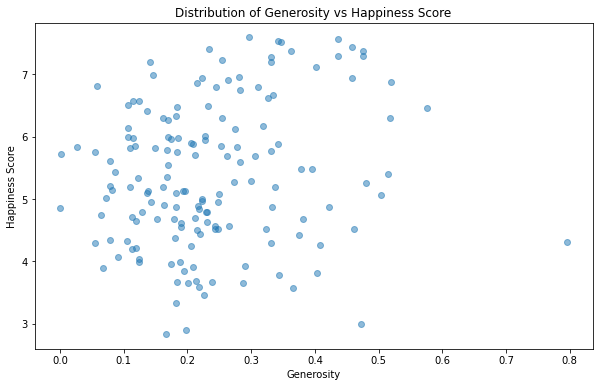

In [17]:
output_variable ='Happiness Score'

for column in cols:
    if column != output_variable:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        plt.scatter(df[column], df[output_variable], alpha=0.5)
        plt.xlabel(column)
        plt.ylabel(output_variable)
        plt.title(f'Distribution of {column} vs {output_variable}')
        plt.show()

## Plot Regplot of Featres against Output Variable

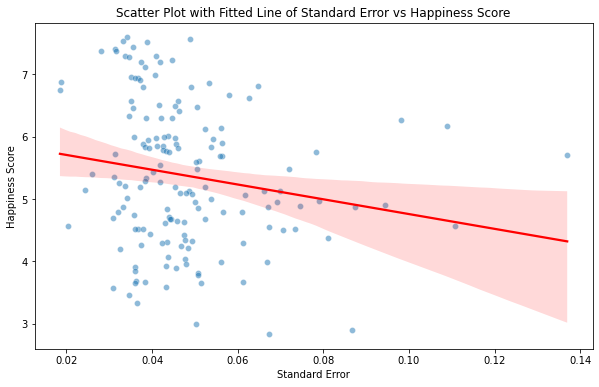

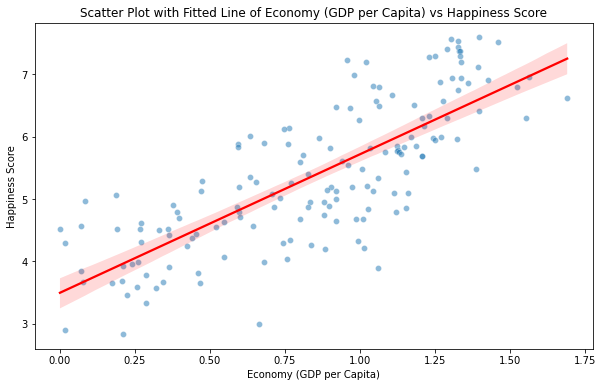

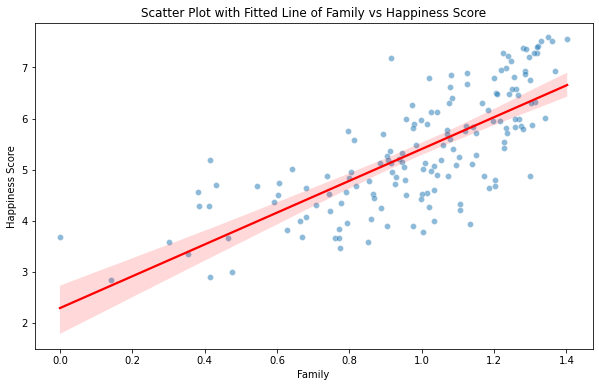

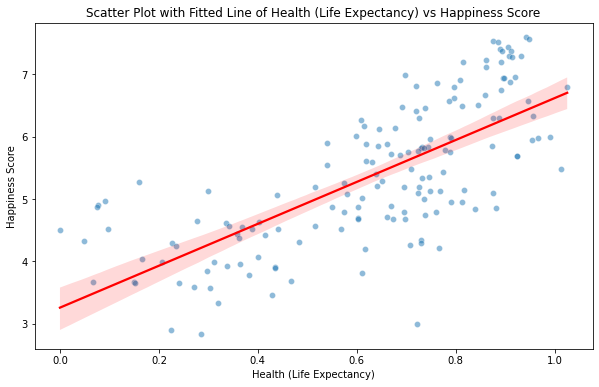

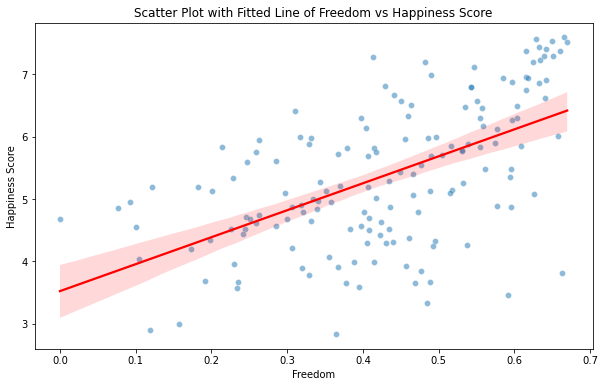

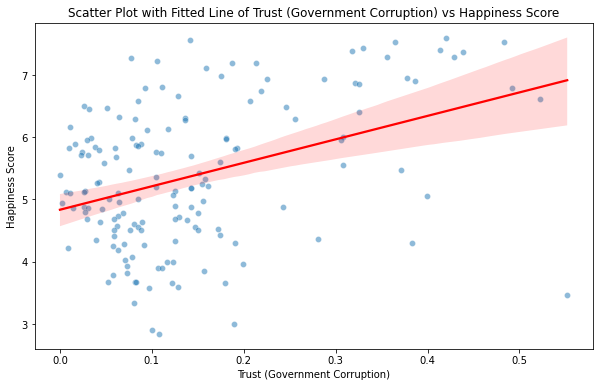

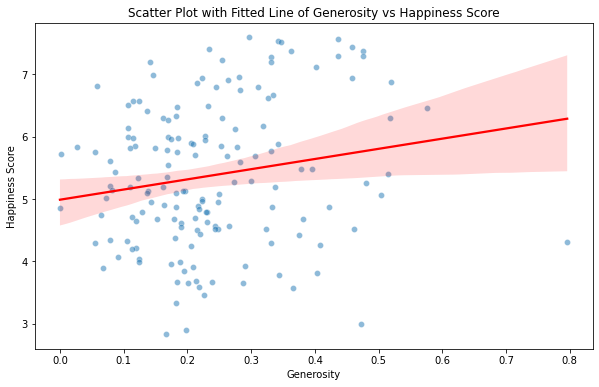

In [18]:
for column in cols:
    if column != output_variable:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        sns.scatterplot(data=df, x=column, y=output_variable, alpha=0.5)
        sns.regplot(data=df, x=column, y=output_variable, scatter=False, color='red')  # Add the fitted line
        plt.xlabel(column)
        plt.ylabel(output_variable)
        plt.title(f'Scatter Plot with Fitted Line of {column} vs {output_variable}')
        plt.show()

## Plot Residplot Features Against Happiness Score

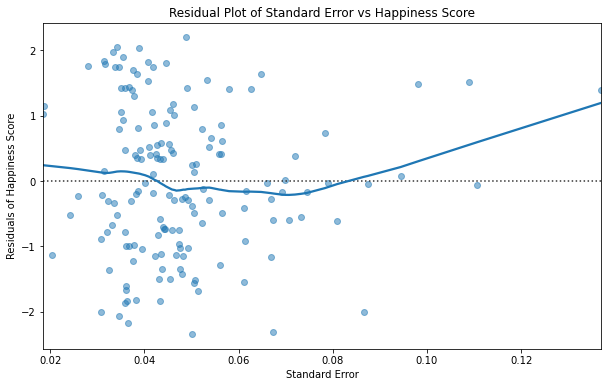

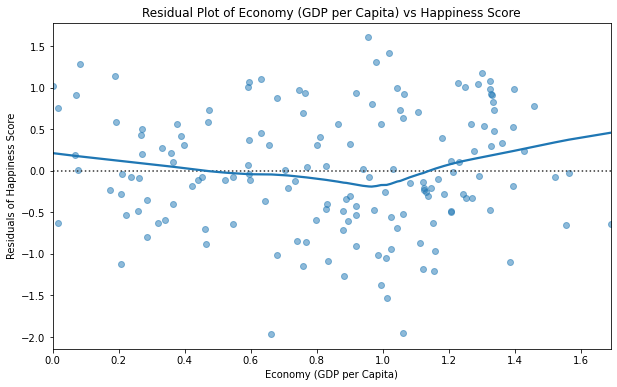

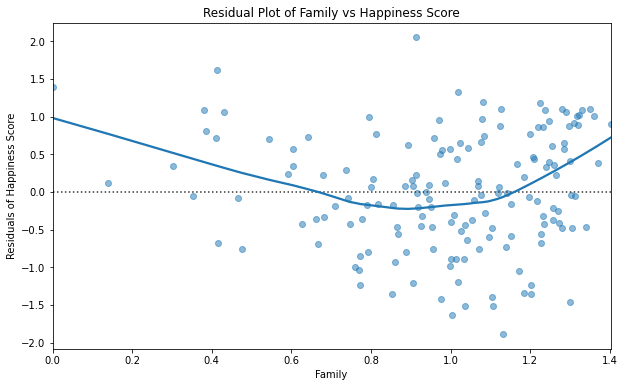

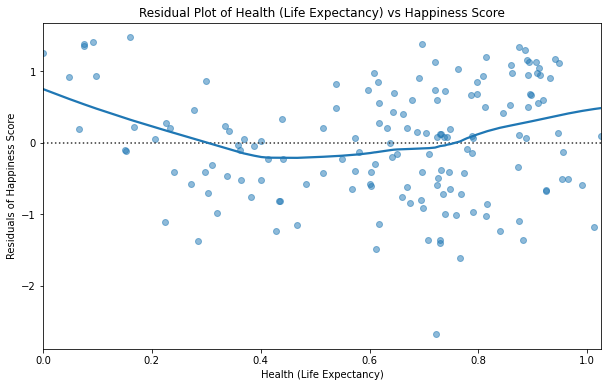

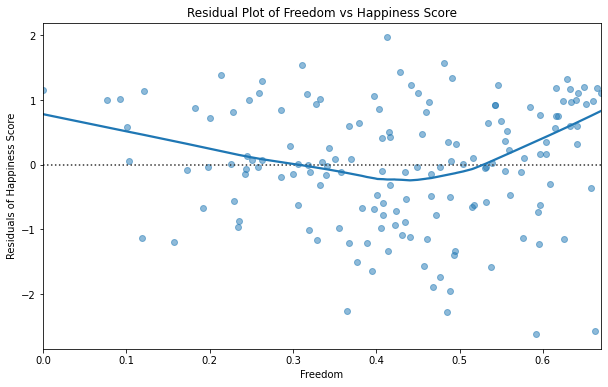

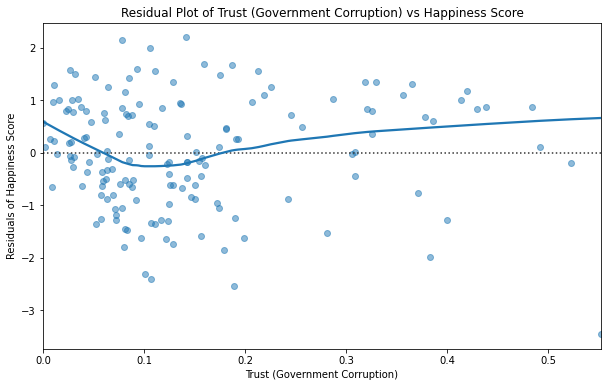

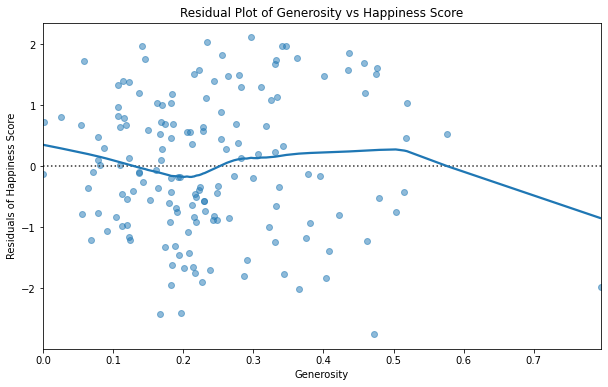

In [19]:
for column in cols:
    if column != output_variable:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        sns.residplot(data=df, x=column, y=output_variable, lowess=True, scatter_kws={'alpha': 0.5})
        plt.xlabel(column)
        plt.ylabel(f'Residuals of {output_variable}')
        plt.title(f'Residual Plot of {column} vs {output_variable}')
        plt.show()

## Pair Plot 

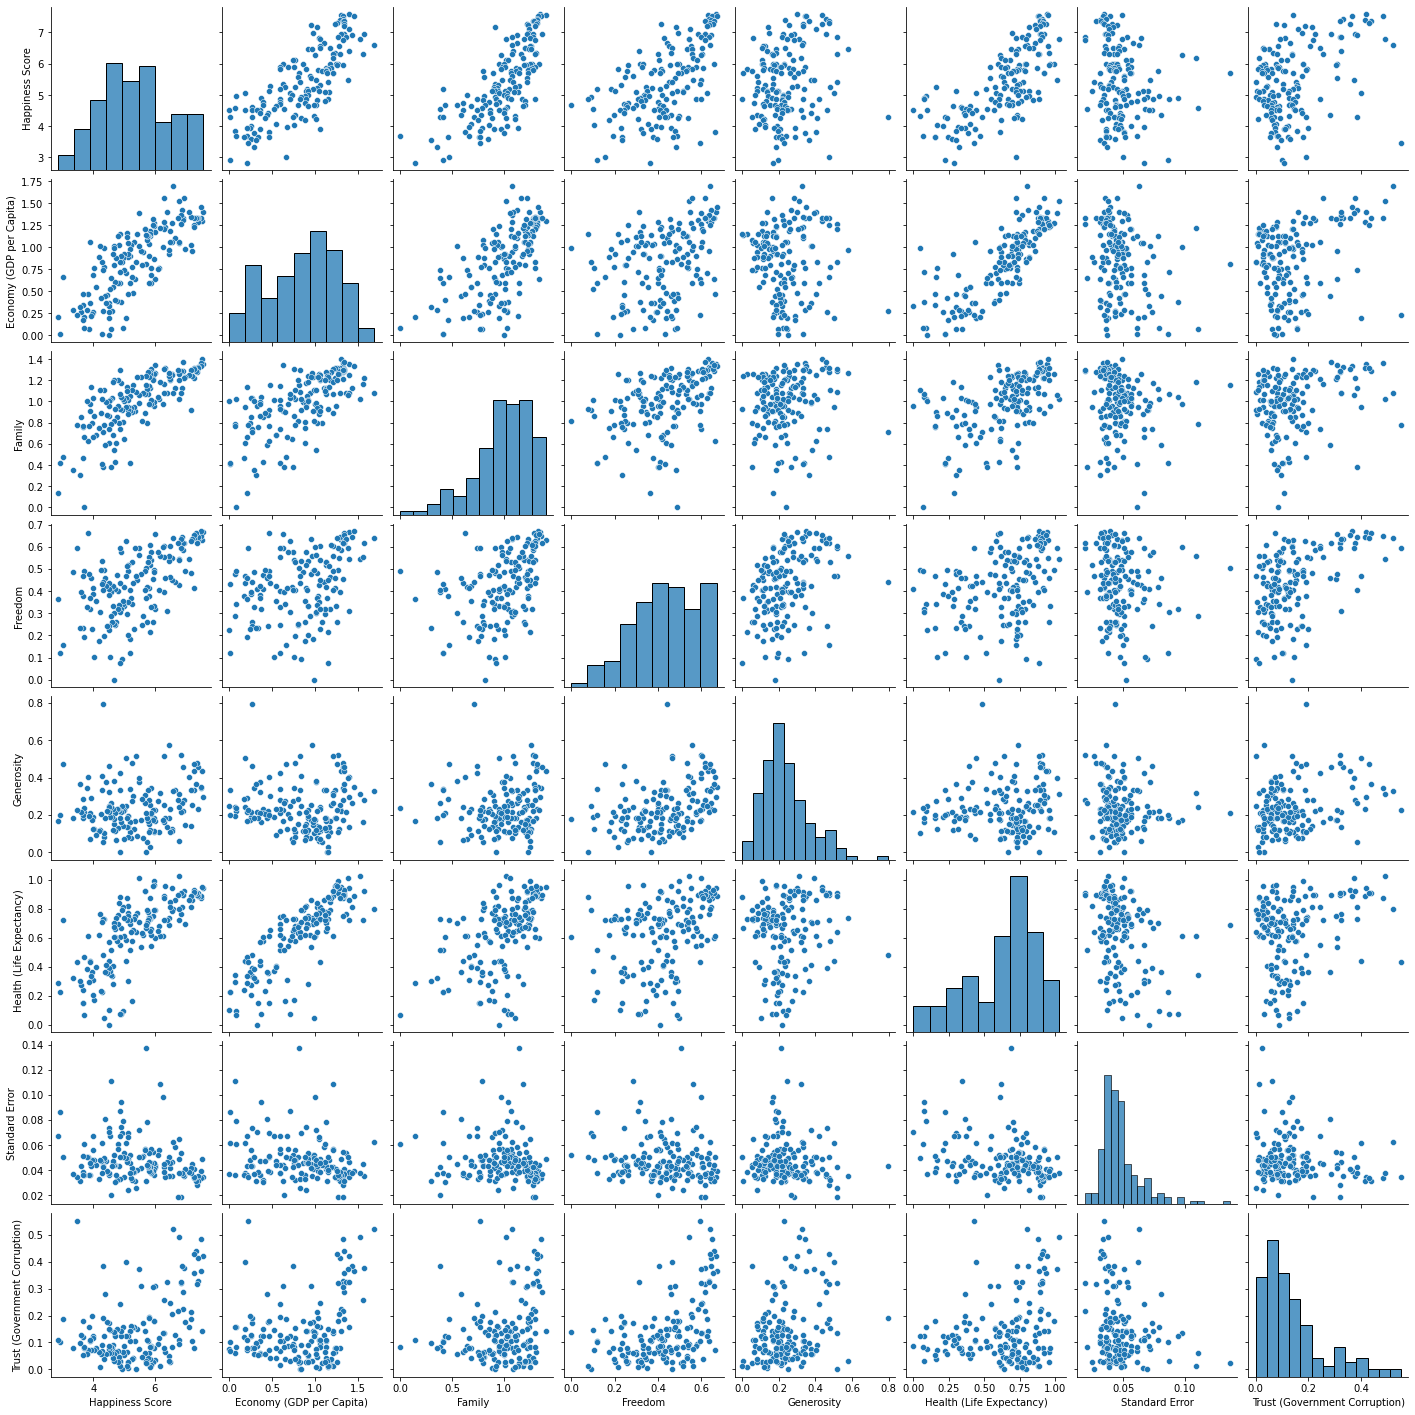

In [20]:
data_for_pair_plot = df[[output_variable] + list(df.iloc[:,3:11].columns.difference([output_variable]))]
# Create the pair plot
sns.pairplot(data_for_pair_plot)
plt.show()

## Heatmap to Find the impact of features on each other and output 

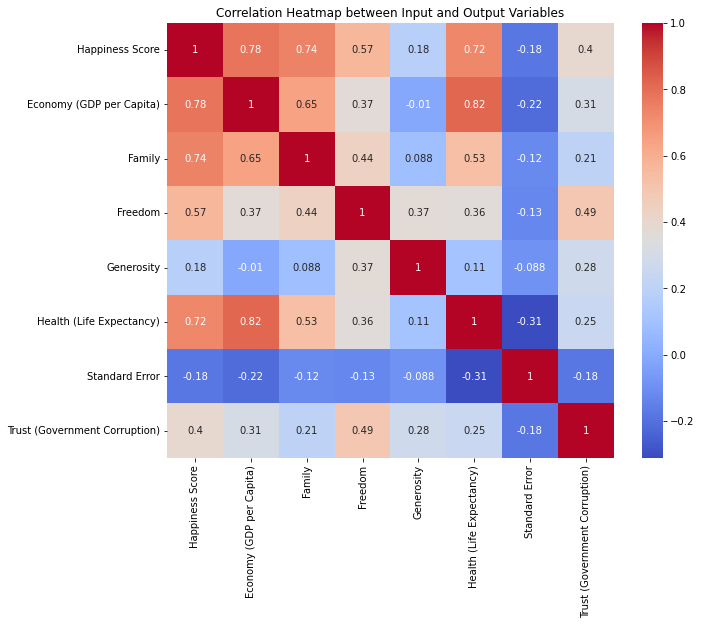

In [21]:
correlation_matrix = data_for_pair_plot.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Input and Output Variables')
plt.show()

### From above : 

1. Happiness Score most affected by : (Positive relation) : Economy , Family , Health , Freedom 
2. Least affected by : Trust , Geneoristy (positive relation) 
3. Negative relation : Standard Error (Dystopia ) 

1. Economy Postive realtion : Health, Family , Freedom , Trust 
2. Negative realtion : Standard error , generosity 

1. Family (positive relation ) : Health , Freedom 

1. Generosity : Freedom  , least : Economy

1. Health : Trust

1. Group 1 :
    Happiness Score + Economy + Health 

2. Group 2: 
    Happiness Score + Family + Freedom 

3. Group 3: 
    Happiness Score + Economy + Trust 


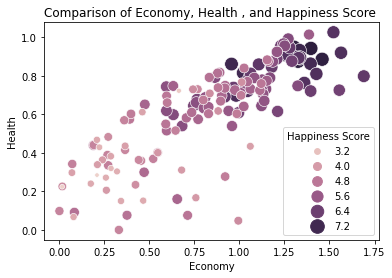

In [22]:
# Create a scatter plot with color representing the third variable
sns.scatterplot(data=df, x=df['Economy (GDP per Capita)'], y=df['Health (Life Expectancy)'], hue=df['Happiness Score'], size=df['Happiness Score'], sizes=(20, 200))
plt.xlabel('Economy')
plt.ylabel('Health')
plt.title(f'Comparison of Economy, Health , and Happiness Score ')
plt.legend(title='Happiness Score')
plt.show()

## Concentration of high happiness score is towards the max health and economy value. Also, Health and Economy both shows linear dependency.

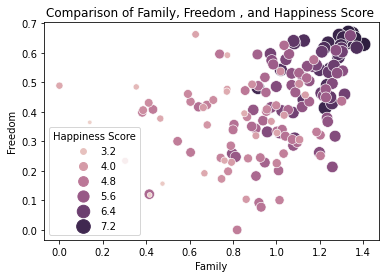

In [23]:
# Create a scatter plot with color representing the third variable
sns.scatterplot(data=df, x=df['Family'], y=df['Freedom'], hue=df['Happiness Score'], size=df['Happiness Score'], sizes=(20, 200))
plt.xlabel('Family')
plt.ylabel('Freedom')
plt.title(f'Comparison of Family, Freedom , and Happiness Score ')
plt.legend(title='Happiness Score')
plt.show()

## Concentration of High Happiness score is towards the high freedom and family value, also this hows Freedom and Family has a linear dependency. 

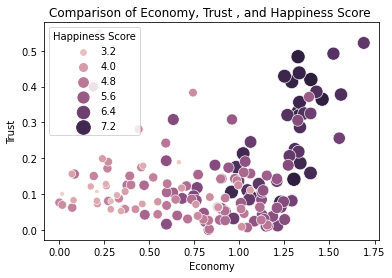

In [24]:
sns.scatterplot(data=df, x=df['Economy (GDP per Capita)'], y=df['Trust (Government Corruption)'], hue=df['Happiness Score'], size=df['Happiness Score'], sizes=(20, 200))
plt.xlabel('Economy')
plt.ylabel('Trust')
plt.title(f'Comparison of Economy, Trust , and Happiness Score ')
plt.legend(title='Happiness Score')
plt.show()

### Major Concentration is in center , with trust value 0.1 to 0.2 , And Economy 1 to 1.25 ANd Happiness SCore value : 4.8 to 6.4.
## Yet, we can see a Happiness Score value of 7.2 has high trust value and high Economy value.

## 9. Feature Engineering 


To understand this better , lets divide the Happiness Score into 5 factors as per standard deviation and create a Categorical Column. 

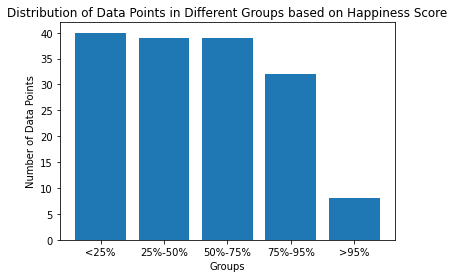

In [25]:

# Replace 'output_column' with the name of your continuous output column
output_column = 'Happiness Score'

# Calculate the standard deviation of the output column
output_std = df[output_column].std()

# Define the ranges for groups
group_ranges = [-np.inf, np.percentile(df[output_column], 25),
                np.percentile(df[output_column], 50),
                np.percentile(df[output_column], 75),
                np.percentile(df[output_column], 95),
                np.inf]

# Define the corresponding group labels
group_labels = ['<25%', '25%-50%', '50%-75%', '75%-95%', '>95%']

# Create a new column with the group labels
df['group'] = pd.cut(df[output_column], bins=group_ranges, labels=group_labels)

# Count the number of data points in each group
group_counts = df['group'].value_counts().sort_index()

# Create a bar plot of the group distribution
plt.bar(group_labels, group_counts)
plt.xlabel('Groups')
plt.ylabel('Number of Data Points')
plt.title(f'Distribution of Data Points in Different Groups based on {output_column}')
plt.show()


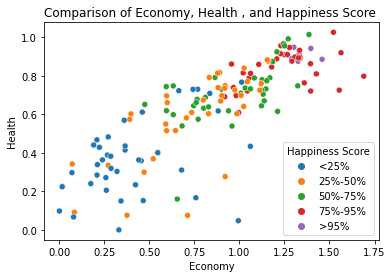

In [26]:
# Create a scatter plot with color representing the third variable
sns.scatterplot(data=df, x=df['Economy (GDP per Capita)'], y=df['Health (Life Expectancy)'], hue=df['group'])
plt.xlabel('Economy')
plt.ylabel('Health')
plt.title(f'Comparison of Economy, Health , and Happiness Score ')
plt.legend(title='Happiness Score')
plt.show()

## 10. Find Outliers by visaulising in Box plots. 

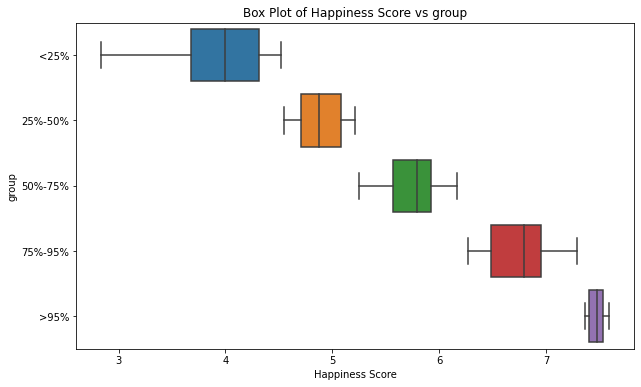

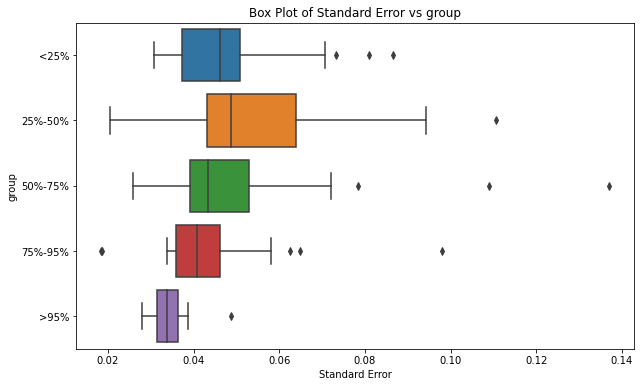

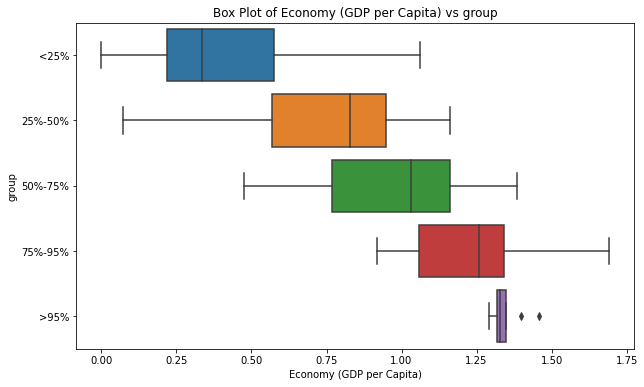

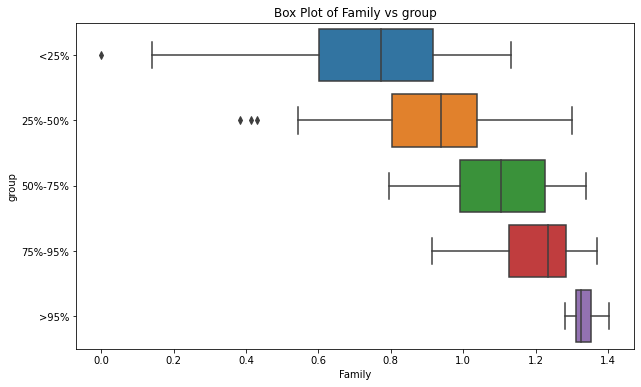

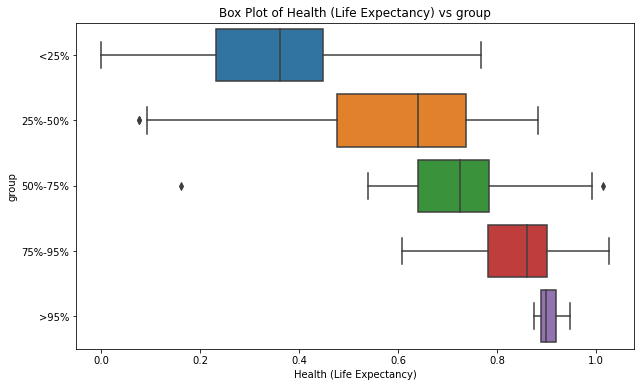

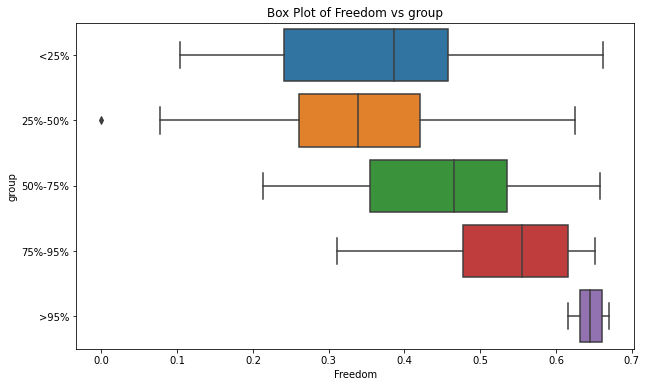

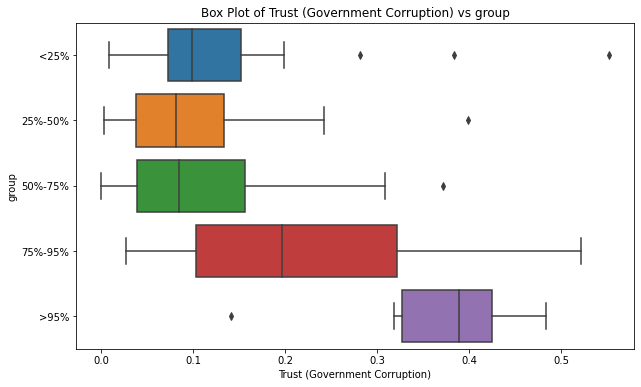

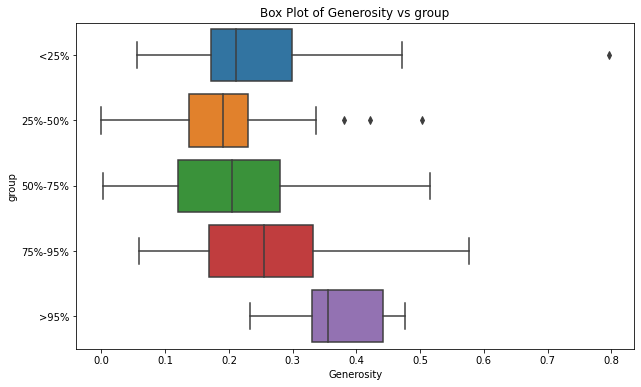

In [27]:
output_variable = 'group'

# Loop through each column (excluding the output variable)
for column in cols:
    if column != output_variable:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        sns.boxplot(data=df, x=column, y=output_variable)
        plt.xlabel(column)
        plt.ylabel(output_variable)
        plt.title(f'Box Plot of {column} vs {output_variable}')
        plt.show()


## I can see few outliers in the data, but before making any manipuation in data 
## First I want to find get the feature importance. 
# And data with utmost importance and with outliers, I will only manipulate that. 

## 11 Standardsing the Dataset 

In [28]:
# Separate features and target variable
X = df.iloc[:,4:11]
y = df['group']

from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

X_data = scale.fit_transform(X)
X_data = pd.DataFrame(data=X_data,columns=X.columns)
X_data


,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040
1,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856
2,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293
3,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638
4,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563
...,...,...,...,...,...,...,...
153,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228
154,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117
155,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891
156,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950


## 12. Feature Importance

In [29]:

from sklearn.ensemble import RandomForestClassifier



# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Get the feature names
feature_names = list(X.columns)

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print("Feature Importance Table:")
print(feature_importance_df)

Feature Importance Table:
                         Feature  Importance
1       Economy (GDP per Capita)    0.195264
2                         Family    0.192930
3       Health (Life Expectancy)    0.179517
4                        Freedom    0.128657
5  Trust (Government Corruption)    0.115188
0                 Standard Error    0.102538
6                     Generosity    0.085906


## As we can see Economy and Health plays a major role while Generosity and Standard Error are least important.

## So, lets see if Economy or Health has major outliers to be manipulated. 

## 12. Outlier removal 

In [30]:
# Copy the DataFrame to work with
df_copy = df.copy()

# Replace 'output_column' with the name of your continuous output column
output_column = 'group'

# Specify the columns to consider (3 to 10)
columns_to_consider = df_copy.columns[4:11]

# Group by the output column and calculate the mean for each column
grouped_means = df_copy.groupby(output_column)[columns_to_consider].median()
grouped_means

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
group,,,,,,,
<25%,0.046125,0.336085,0.771900,0.360825,0.385695,0.098905,0.210880
25%-50%,0.048640,0.828190,0.937930,0.640450,0.339160,0.080790,0.190620
50%-75%,0.043300,1.031920,1.103950,0.723940,0.466110,0.084540,0.205360
75%-95%,0.040795,1.258275,1.235375,0.859420,0.555815,0.196610,0.254365
>95%,0.033695,1.327865,1.326780,0.899235,0.645535,0.389375,0.354805


In [31]:
grouped = df_copy.groupby('group')
# Calculate z-scores for each column within each group
z_scores = pd.DataFrame()
for col in columns_to_consider:
    mean_by_group = grouped[col].transform('mean')
    std_by_group = grouped[col].transform('std')
    z_score_col = (df_copy[col] - mean_by_group) / std_by_group
    z_scores[col] = z_score_col

# Iterate through each column and its z-score threshold
for col in columns_to_consider:
    z_threshold = 2.5
    outlier_mask = abs(z_scores[col]) > z_threshold
    outlier_indices = z_scores[outlier_mask].index
    
    group_means = grouped[col].transform('mean')
    df_copy.loc[outlier_indices, col] = group_means

In [32]:
# Calculate skewness for each feature
skewness = df_copy.skew()

# Print the skewness for each feature
print("Skewness for each feature:")
print(skewness)

Skewness for each feature:
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.005213
Economy (GDP per Capita)        -0.317575
Family                          -0.860994
Health (Life Expectancy)        -0.727451
Freedom                         -0.437451
Trust (Government Corruption)    1.467173
Generosity                       0.631649
Dystopia Residual               -0.238911
dtype: float64


/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_8248/2288050877.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



## 13. Separating the Input and output and Standardising the updated Dataset. 

In [34]:
# Separate features and target variable
X = df_copy.iloc[:,5:10]
y = df_copy['Happiness Score']

from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

X_data = scale.fit_transform(X)
X_data = pd.DataFrame(data=X_data,columns=X.columns)
X_data

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
0,1.369621,1.348619,1.263315,1.567665,2.582411
1,1.135226,1.550593,1.289638,1.322662,0.054077
2,1.192861,1.391029,0.989039,1.459877,3.161876
3,1.525130,1.277515,1.032445,1.595361,2.085065
4,1.194876,1.245564,1.116301,1.350624,1.762949
...,...,...,...,...,...
153,-1.552987,-0.857343,-0.842480,1.077925,-0.089370
154,-1.392303,-2.465774,-1.292311,0.362157,-0.503223
155,-0.455245,-2.002101,0.361928,-1.819302,0.486564
156,-2.067566,-2.228210,-1.683008,-2.074558,-0.316820


## 14. Spliting the Data 

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data, y, test_size=0.3, random_state =100)

print(X.shape, X_train.shape, X_test.shape)

(158, 5) (110, 5) (48, 5)


## 15 Data Modeling 

Create a machine learning model pipeline which contains a list of model from which. we want to compare and find the most appropiate algorithm

In [36]:
### Import the model:

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR


from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV


model_pipeline = []    ### create a pipeline model_pipeline

### Append the models and make some necessary updates to their parameters for better model performance.

model_pipeline.append(LinearRegression())

model_pipeline.append(Ridge(alpha=1.0))

model_pipeline.append(Lasso(alpha=1.0))

model_pipeline.append(SVR(kernel='linear'))

model_pipeline.append(DecisionTreeRegressor())

model_pipeline.append(RandomForestRegressor())


## 16. Fit model for train dataset 

In [38]:
for model in model_pipeline:
    model.fit(X_train,Y_train)    

## 17 . Fetch and compare the metric values from various models and find the best model. 

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#importing
cross_vals=[]
r_squareds = []
r=[]
mses=[]
rmses=[]
maes=[]

for model in model_pipeline:
    
    y_pred = model.predict(X_test)
    
    y_pred_train = model.predict(X_train)
    
    
    cross_vals.append(cross_val_score(model, X, y, cv=5, scoring='r2').max())
    
    r_squareds.append(r2_score(Y_test,y_pred))
    
    r.append(r2_score(Y_train,y_pred_train))
    
    
    mses.append(mean_squared_error(Y_test,y_pred))
    
    rmses.append(np.sqrt(mean_squared_error(Y_test,y_pred)))
    
    maes.append(mean_absolute_error(Y_test, y_pred))
    

model_list=['Linear_Regression','Ridge','Lasso','SVR','Decision Tree Regressor','Random Forest Regressor']

score_list = pd.DataFrame({'Model':model_list,'Cross_validation_score': cross_vals, 
                           'R_squared':r_squareds,'R_squared(train)':r, 'mse': mses, 
                           'rmse':rmses, 'mae':maes})
score_list

,Model,Cross_validation_score,R_squared,R_squared(train),mse,rmse,mae
0,Linear_Regression,-3.450699,0.810087,0.793113,0.254730,0.504707,0.404952
1,Ridge,-2.708446,0.809404,0.793103,0.255645,0.505613,0.405874
2,Lasso,-0.340058,-0.000006,0.000000,1.341301,1.158146,0.998214
3,SVR,-2.975024,0.818994,0.791646,0.242782,0.492729,0.395017
4,Decision Tree Regressor,-8.245938,0.453597,1.000000,0.732887,0.856088,0.673854
5,Random Forest Regressor,-5.591382,0.730410,0.961382,0.361600,0.601332,0.480754


In [ ]:

1. The R-squared (coefficient of determination) value ranges between 0 and 1 and represents the proportion of the variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit of the model to the data, as it implies that a larger proportion of the variability in the target variable can be attributed to the model's predictions.

As, we can Infer Linear Regression  gives best R-squared Value with (0.81). 
Random Forest Regressor is the best model here. 

3. RMSE( Root Mean Squared Error) A lower RMSE value indicates that the model's predictions are closer to the actual target values, which is desirable as it indicates a better fit of the model to the data.

As, we can Infer again Linear_Regression has the least value. 



## Linear Regression is the probably the better model. A model giving 75% above accuracy is considered to be agood model. 